## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.01


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3         X4         Y
0  67.458835  1460.745270  0.012331   2.172074  0.164844
1  67.745328   387.895189  0.011741   7.102254  0.016634
2  74.423267  1396.650705  0.712991   3.016984  1.601587
3  83.808049  1634.111026  0.593619  10.745176  1.388165
4   6.855960   879.804767  0.899942  10.003102  1.549433


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.21825 | train_mse: 3.10693 | train_mae: 1.27426 |  0:00:00s
epoch 1  | loss: 0.74519 | train_mse: 2.87255 | train_mae: 1.1746  |  0:00:00s
epoch 2  | loss: 0.66383 | train_mse: 2.44413 | train_mae: 1.08369 |  0:00:00s


epoch 3  | loss: 0.43445 | train_mse: 2.18008 | train_mae: 1.03124 |  0:00:00s
epoch 4  | loss: 1.00312 | train_mse: 2.21967 | train_mae: 1.06592 |  0:00:00s
epoch 5  | loss: 0.59509 | train_mse: 1.71542 | train_mae: 0.90504 |  0:00:00s


epoch 6  | loss: 0.63384 | train_mse: 1.0332  | train_mae: 0.69822 |  0:00:00s
epoch 7  | loss: 0.68695 | train_mse: 0.84982 | train_mae: 0.64905 |  0:00:00s
epoch 8  | loss: 0.54228 | train_mse: 0.89017 | train_mae: 0.65036 |  0:00:00s


epoch 9  | loss: 0.5327  | train_mse: 1.02538 | train_mae: 0.67824 |  0:00:00s
epoch 10 | loss: 0.45887 | train_mse: 1.35144 | train_mae: 0.7293  |  0:00:01s
epoch 11 | loss: 0.35397 | train_mse: 1.35125 | train_mae: 0.66176 |  0:00:01s


epoch 12 | loss: 0.43223 | train_mse: 1.04503 | train_mae: 0.59411 |  0:00:01s
epoch 13 | loss: 0.50358 | train_mse: 0.6699  | train_mae: 0.51778 |  0:00:01s
epoch 14 | loss: 0.59514 | train_mse: 0.41394 | train_mae: 0.47149 |  0:00:01s


epoch 15 | loss: 0.31797 | train_mse: 0.41192 | train_mae: 0.50642 |  0:00:01s
epoch 16 | loss: 0.54434 | train_mse: 0.5646  | train_mae: 0.52957 |  0:00:01s
epoch 17 | loss: 0.43679 | train_mse: 0.58558 | train_mae: 0.53237 |  0:00:01s
epoch 18 | loss: 0.41843 | train_mse: 0.2881  | train_mae: 0.40004 |  0:00:01s


epoch 19 | loss: 0.37393 | train_mse: 0.60719 | train_mae: 0.50303 |  0:00:01s
epoch 20 | loss: 0.26174 | train_mse: 1.09157 | train_mae: 0.65061 |  0:00:01s
epoch 21 | loss: 0.40367 | train_mse: 0.82825 | train_mae: 0.54158 |  0:00:01s
epoch 22 | loss: 0.27674 | train_mse: 0.64023 | train_mae: 0.51203 |  0:00:01s


epoch 23 | loss: 0.34039 | train_mse: 0.5485  | train_mae: 0.46215 |  0:00:01s
epoch 24 | loss: 0.35009 | train_mse: 0.59793 | train_mae: 0.48284 |  0:00:01s
epoch 25 | loss: 0.34818 | train_mse: 0.34348 | train_mae: 0.38141 |  0:00:02s


epoch 26 | loss: 0.24281 | train_mse: 0.23869 | train_mae: 0.34729 |  0:00:02s
epoch 27 | loss: 0.34859 | train_mse: 0.23741 | train_mae: 0.35195 |  0:00:02s
epoch 28 | loss: 0.30264 | train_mse: 0.27523 | train_mae: 0.38439 |  0:00:02s


epoch 29 | loss: 0.22344 | train_mse: 0.24485 | train_mae: 0.36607 |  0:00:02s
epoch 30 | loss: 0.21473 | train_mse: 0.2378  | train_mae: 0.36607 |  0:00:02s
epoch 31 | loss: 0.2592  | train_mse: 0.22448 | train_mae: 0.36006 |  0:00:02s
epoch 32 | loss: 0.23165 | train_mse: 0.21567 | train_mae: 0.36374 |  0:00:02s


epoch 33 | loss: 0.20723 | train_mse: 0.20372 | train_mae: 0.34675 |  0:00:02s
epoch 34 | loss: 0.26796 | train_mse: 0.18209 | train_mae: 0.33533 |  0:00:02s
epoch 35 | loss: 0.19414 | train_mse: 0.15227 | train_mae: 0.30078 |  0:00:02s


epoch 36 | loss: 0.15583 | train_mse: 0.19255 | train_mae: 0.32417 |  0:00:02s
epoch 37 | loss: 0.1592  | train_mse: 0.17321 | train_mae: 0.30937 |  0:00:02s
epoch 38 | loss: 0.14216 | train_mse: 0.15869 | train_mae: 0.2994  |  0:00:02s


epoch 39 | loss: 0.2341  | train_mse: 0.13963 | train_mae: 0.28874 |  0:00:02s
epoch 40 | loss: 0.14191 | train_mse: 0.1428  | train_mae: 0.29183 |  0:00:03s
epoch 41 | loss: 0.17768 | train_mse: 0.17906 | train_mae: 0.31818 |  0:00:03s


epoch 42 | loss: 0.26667 | train_mse: 0.20366 | train_mae: 0.3198  |  0:00:03s
epoch 43 | loss: 0.23012 | train_mse: 0.19613 | train_mae: 0.31541 |  0:00:03s
epoch 44 | loss: 0.24591 | train_mse: 0.16969 | train_mae: 0.29824 |  0:00:03s
epoch 45 | loss: 0.19709 | train_mse: 0.15574 | train_mae: 0.29515 |  0:00:03s


epoch 46 | loss: 0.23821 | train_mse: 0.16321 | train_mae: 0.29919 |  0:00:03s
epoch 47 | loss: 0.18069 | train_mse: 0.161   | train_mae: 0.29638 |  0:00:03s
epoch 48 | loss: 0.14639 | train_mse: 0.2521  | train_mae: 0.3401  |  0:00:03s
epoch 49 | loss: 0.28202 | train_mse: 0.32395 | train_mae: 0.37102 |  0:00:03s


epoch 50 | loss: 0.18601 | train_mse: 0.26756 | train_mae: 0.35029 |  0:00:03s
epoch 51 | loss: 0.35803 | train_mse: 0.14452 | train_mae: 0.28173 |  0:00:03s
epoch 52 | loss: 0.19383 | train_mse: 0.12584 | train_mae: 0.25795 |  0:00:03s


epoch 53 | loss: 0.26652 | train_mse: 0.13286 | train_mae: 0.26564 |  0:00:03s
epoch 54 | loss: 0.31929 | train_mse: 0.13317 | train_mae: 0.26758 |  0:00:03s
epoch 55 | loss: 0.181   | train_mse: 0.14607 | train_mae: 0.27874 |  0:00:04s
epoch 56 | loss: 0.2509  | train_mse: 0.14704 | train_mae: 0.28569 |  0:00:04s


epoch 57 | loss: 0.20504 | train_mse: 0.14916 | train_mae: 0.28054 |  0:00:04s
epoch 58 | loss: 0.19991 | train_mse: 0.13029 | train_mae: 0.27077 |  0:00:04s
epoch 59 | loss: 0.14445 | train_mse: 0.1157  | train_mae: 0.26825 |  0:00:04s
epoch 60 | loss: 0.15071 | train_mse: 0.11809 | train_mae: 0.26553 |  0:00:04s


epoch 61 | loss: 0.28763 | train_mse: 0.13548 | train_mae: 0.28302 |  0:00:04s
epoch 62 | loss: 0.27438 | train_mse: 0.13294 | train_mae: 0.2767  |  0:00:04s
epoch 63 | loss: 0.14178 | train_mse: 0.11864 | train_mae: 0.25907 |  0:00:04s


epoch 64 | loss: 0.20716 | train_mse: 0.11797 | train_mae: 0.24697 |  0:00:04s
epoch 65 | loss: 0.15985 | train_mse: 0.15024 | train_mae: 0.27524 |  0:00:04s
epoch 66 | loss: 0.18029 | train_mse: 0.1621  | train_mae: 0.27773 |  0:00:04s


epoch 67 | loss: 0.19127 | train_mse: 0.16517 | train_mae: 0.28094 |  0:00:04s
epoch 68 | loss: 0.12191 | train_mse: 0.13868 | train_mae: 0.26245 |  0:00:05s
epoch 69 | loss: 0.12222 | train_mse: 0.15065 | train_mae: 0.28442 |  0:00:05s


epoch 70 | loss: 0.16786 | train_mse: 0.15359 | train_mae: 0.29429 |  0:00:05s
epoch 71 | loss: 0.2341  | train_mse: 0.16816 | train_mae: 0.29789 |  0:00:05s
epoch 72 | loss: 0.17921 | train_mse: 0.1695  | train_mae: 0.28676 |  0:00:05s


epoch 73 | loss: 0.18095 | train_mse: 0.15383 | train_mae: 0.27398 |  0:00:05s
epoch 74 | loss: 0.14881 | train_mse: 0.14423 | train_mae: 0.26249 |  0:00:05s
epoch 75 | loss: 0.1378  | train_mse: 0.16236 | train_mae: 0.28246 |  0:00:05s


epoch 76 | loss: 0.18934 | train_mse: 0.17187 | train_mae: 0.29306 |  0:00:05s
epoch 77 | loss: 0.13703 | train_mse: 0.17298 | train_mae: 0.28322 |  0:00:05s


epoch 78 | loss: 0.13851 | train_mse: 0.1676  | train_mae: 0.27687 |  0:00:05s
epoch 79 | loss: 0.21696 | train_mse: 0.12534 | train_mae: 0.24688 |  0:00:06s
epoch 80 | loss: 0.11851 | train_mse: 0.09654 | train_mae: 0.23997 |  0:00:06s


epoch 81 | loss: 0.207   | train_mse: 0.09734 | train_mae: 0.23674 |  0:00:06s
epoch 82 | loss: 0.23984 | train_mse: 0.11502 | train_mae: 0.24002 |  0:00:06s
epoch 83 | loss: 0.17021 | train_mse: 0.14108 | train_mae: 0.26776 |  0:00:06s


epoch 84 | loss: 0.10703 | train_mse: 0.13862 | train_mae: 0.25821 |  0:00:06s
epoch 85 | loss: 0.23836 | train_mse: 0.14648 | train_mae: 0.27568 |  0:00:06s
epoch 86 | loss: 0.14648 | train_mse: 0.13054 | train_mae: 0.25521 |  0:00:06s
epoch 87 | loss: 0.21783 | train_mse: 0.11538 | train_mae: 0.25305 |  0:00:06s


epoch 88 | loss: 0.14925 | train_mse: 0.10522 | train_mae: 0.24671 |  0:00:06s
epoch 89 | loss: 0.26692 | train_mse: 0.11243 | train_mae: 0.24475 |  0:00:06s
epoch 90 | loss: 0.13805 | train_mse: 0.14655 | train_mae: 0.25947 |  0:00:06s
epoch 91 | loss: 0.20932 | train_mse: 0.14358 | train_mae: 0.25176 |  0:00:06s


epoch 92 | loss: 0.18239 | train_mse: 0.16836 | train_mae: 0.27592 |  0:00:06s
epoch 93 | loss: 0.39322 | train_mse: 0.17068 | train_mae: 0.28437 |  0:00:06s
epoch 94 | loss: 0.15043 | train_mse: 0.12179 | train_mae: 0.24909 |  0:00:07s
epoch 95 | loss: 0.14542 | train_mse: 0.09716 | train_mae: 0.22938 |  0:00:07s


epoch 96 | loss: 0.18514 | train_mse: 0.09495 | train_mae: 0.23552 |  0:00:07s
epoch 97 | loss: 0.19106 | train_mse: 0.10459 | train_mae: 0.24315 |  0:00:07s
epoch 98 | loss: 0.25706 | train_mse: 0.10801 | train_mae: 0.22898 |  0:00:07s


epoch 99 | loss: 0.1623  | train_mse: 0.11056 | train_mae: 0.24087 |  0:00:07s
epoch 100| loss: 0.10233 | train_mse: 0.09811 | train_mae: 0.22935 |  0:00:07s
epoch 101| loss: 0.27056 | train_mse: 0.09222 | train_mae: 0.22981 |  0:00:07s
epoch 102| loss: 0.1492  | train_mse: 0.09864 | train_mae: 0.2306  |  0:00:07s


epoch 103| loss: 0.14696 | train_mse: 0.10688 | train_mae: 0.23163 |  0:00:07s
epoch 104| loss: 0.08502 | train_mse: 0.09825 | train_mae: 0.22185 |  0:00:07s
epoch 105| loss: 0.09989 | train_mse: 0.11123 | train_mae: 0.23728 |  0:00:07s
epoch 106| loss: 0.17727 | train_mse: 0.10879 | train_mae: 0.22538 |  0:00:07s


epoch 107| loss: 0.16249 | train_mse: 0.0935  | train_mae: 0.22624 |  0:00:07s
epoch 108| loss: 0.18923 | train_mse: 0.10662 | train_mae: 0.22879 |  0:00:07s
epoch 109| loss: 0.24917 | train_mse: 0.11785 | train_mae: 0.23439 |  0:00:08s
epoch 110| loss: 0.10014 | train_mse: 0.11646 | train_mae: 0.23758 |  0:00:08s


epoch 111| loss: 0.35915 | train_mse: 0.10506 | train_mae: 0.23889 |  0:00:08s
epoch 112| loss: 0.23701 | train_mse: 0.08621 | train_mae: 0.23697 |  0:00:08s
epoch 113| loss: 0.09133 | train_mse: 0.0733  | train_mae: 0.21433 |  0:00:08s


epoch 114| loss: 0.11858 | train_mse: 0.07971 | train_mae: 0.21631 |  0:00:08s
epoch 115| loss: 0.10587 | train_mse: 0.08332 | train_mae: 0.21472 |  0:00:08s
epoch 116| loss: 0.14728 | train_mse: 0.10277 | train_mae: 0.22388 |  0:00:08s
epoch 117| loss: 0.09914 | train_mse: 0.10395 | train_mae: 0.22419 |  0:00:08s


epoch 118| loss: 0.20506 | train_mse: 0.12816 | train_mae: 0.24041 |  0:00:08s
epoch 119| loss: 0.15296 | train_mse: 0.08682 | train_mae: 0.2088  |  0:00:08s
epoch 120| loss: 0.20792 | train_mse: 0.09346 | train_mae: 0.22501 |  0:00:08s
epoch 121| loss: 0.09665 | train_mse: 0.09019 | train_mae: 0.22155 |  0:00:08s


epoch 122| loss: 0.24081 | train_mse: 0.07899 | train_mae: 0.21122 |  0:00:08s
epoch 123| loss: 0.29176 | train_mse: 0.07577 | train_mae: 0.21182 |  0:00:08s
epoch 124| loss: 0.15474 | train_mse: 0.11267 | train_mae: 0.22798 |  0:00:09s


epoch 125| loss: 0.15654 | train_mse: 0.09622 | train_mae: 0.21318 |  0:00:09s
epoch 126| loss: 0.19027 | train_mse: 0.09965 | train_mae: 0.21774 |  0:00:09s
epoch 127| loss: 0.16875 | train_mse: 0.09284 | train_mae: 0.21902 |  0:00:09s


epoch 128| loss: 0.10198 | train_mse: 0.08452 | train_mae: 0.21414 |  0:00:09s
epoch 129| loss: 0.288   | train_mse: 0.08155 | train_mae: 0.21083 |  0:00:09s
epoch 130| loss: 0.18814 | train_mse: 0.08188 | train_mae: 0.20235 |  0:00:09s
epoch 131| loss: 0.3494  | train_mse: 0.15463 | train_mae: 0.2526  |  0:00:09s


epoch 132| loss: 0.20947 | train_mse: 0.1676  | train_mae: 0.24955 |  0:00:09s
epoch 133| loss: 0.12172 | train_mse: 0.09747 | train_mae: 0.22415 |  0:00:09s
epoch 134| loss: 0.16614 | train_mse: 0.06901 | train_mae: 0.20575 |  0:00:09s
epoch 135| loss: 0.16707 | train_mse: 0.1345  | train_mae: 0.24285 |  0:00:09s


epoch 136| loss: 0.26917 | train_mse: 0.1652  | train_mae: 0.25793 |  0:00:09s
epoch 137| loss: 0.30577 | train_mse: 0.14392 | train_mae: 0.24849 |  0:00:09s
epoch 138| loss: 0.14419 | train_mse: 0.10623 | train_mae: 0.22948 |  0:00:09s
epoch 139| loss: 0.1391  | train_mse: 0.09223 | train_mae: 0.22757 |  0:00:10s


epoch 140| loss: 0.10676 | train_mse: 0.08441 | train_mae: 0.21465 |  0:00:10s
epoch 141| loss: 0.16647 | train_mse: 0.07737 | train_mae: 0.20396 |  0:00:10s
epoch 142| loss: 0.17739 | train_mse: 0.07636 | train_mae: 0.19896 |  0:00:10s


epoch 143| loss: 0.14792 | train_mse: 0.07138 | train_mae: 0.19879 |  0:00:10s
epoch 144| loss: 0.13985 | train_mse: 0.06909 | train_mae: 0.19396 |  0:00:10s
epoch 145| loss: 0.2285  | train_mse: 0.07279 | train_mae: 0.20236 |  0:00:10s


epoch 146| loss: 0.12199 | train_mse: 0.08196 | train_mae: 0.21539 |  0:00:10s
epoch 147| loss: 0.15562 | train_mse: 0.08187 | train_mae: 0.21934 |  0:00:10s
epoch 148| loss: 0.18352 | train_mse: 0.09239 | train_mae: 0.23259 |  0:00:10s
epoch 149| loss: 0.24417 | train_mse: 0.08339 | train_mae: 0.22466 |  0:00:10s


epoch 150| loss: 0.1494  | train_mse: 0.08136 | train_mae: 0.20475 |  0:00:10s
epoch 151| loss: 0.17241 | train_mse: 0.11001 | train_mae: 0.22494 |  0:00:10s
epoch 152| loss: 0.1454  | train_mse: 0.12516 | train_mae: 0.24035 |  0:00:10s
epoch 153| loss: 0.1789  | train_mse: 0.11515 | train_mae: 0.23754 |  0:00:10s


epoch 154| loss: 0.16586 | train_mse: 0.08615 | train_mae: 0.21606 |  0:00:11s
epoch 155| loss: 0.0959  | train_mse: 0.08105 | train_mae: 0.2034  |  0:00:11s
epoch 156| loss: 0.15655 | train_mse: 0.08342 | train_mae: 0.20587 |  0:00:11s


epoch 157| loss: 0.12863 | train_mse: 0.08462 | train_mae: 0.21414 |  0:00:11s
epoch 158| loss: 0.12278 | train_mse: 0.08235 | train_mae: 0.21684 |  0:00:11s
epoch 159| loss: 0.13799 | train_mse: 0.08399 | train_mae: 0.22038 |  0:00:11s
epoch 160| loss: 0.18351 | train_mse: 0.10553 | train_mae: 0.23168 |  0:00:11s


epoch 161| loss: 0.10761 | train_mse: 0.16761 | train_mae: 0.27224 |  0:00:11s
epoch 162| loss: 0.17471 | train_mse: 0.13736 | train_mae: 0.25509 |  0:00:11s
epoch 163| loss: 0.1906  | train_mse: 0.08378 | train_mae: 0.21444 |  0:00:11s
epoch 164| loss: 0.13298 | train_mse: 0.07794 | train_mae: 0.21907 |  0:00:11s


epoch 165| loss: 0.14492 | train_mse: 0.10026 | train_mae: 0.22532 |  0:00:11s
epoch 166| loss: 0.15855 | train_mse: 0.11097 | train_mae: 0.23205 |  0:00:11s
epoch 167| loss: 0.2729  | train_mse: 0.09054 | train_mae: 0.21764 |  0:00:11s
epoch 168| loss: 0.15327 | train_mse: 0.07788 | train_mae: 0.22146 |  0:00:11s


epoch 169| loss: 0.21836 | train_mse: 0.0901  | train_mae: 0.23044 |  0:00:12s
epoch 170| loss: 0.17229 | train_mse: 0.09028 | train_mae: 0.23267 |  0:00:12s
epoch 171| loss: 0.148   | train_mse: 0.08352 | train_mae: 0.22833 |  0:00:12s


epoch 172| loss: 0.15492 | train_mse: 0.08241 | train_mae: 0.22894 |  0:00:12s
epoch 173| loss: 0.22142 | train_mse: 0.08474 | train_mae: 0.2342  |  0:00:12s
epoch 174| loss: 0.14692 | train_mse: 0.08771 | train_mae: 0.23162 |  0:00:12s
epoch 175| loss: 0.21744 | train_mse: 0.11999 | train_mae: 0.24895 |  0:00:12s


epoch 176| loss: 0.16675 | train_mse: 0.11526 | train_mae: 0.24214 |  0:00:12s
epoch 177| loss: 0.19571 | train_mse: 0.08835 | train_mae: 0.2154  |  0:00:12s
epoch 178| loss: 0.09475 | train_mse: 0.08668 | train_mae: 0.2142  |  0:00:12s
epoch 179| loss: 0.14365 | train_mse: 0.08191 | train_mae: 0.21291 |  0:00:12s


epoch 180| loss: 0.13578 | train_mse: 0.08388 | train_mae: 0.22015 |  0:00:12s
epoch 181| loss: 0.15927 | train_mse: 0.0858  | train_mae: 0.22334 |  0:00:12s
epoch 182| loss: 0.12557 | train_mse: 0.08342 | train_mae: 0.21846 |  0:00:12s
epoch 183| loss: 0.30869 | train_mse: 0.08269 | train_mae: 0.21894 |  0:00:12s


epoch 184| loss: 0.18421 | train_mse: 0.09511 | train_mae: 0.23214 |  0:00:13s
epoch 185| loss: 0.16238 | train_mse: 0.10107 | train_mae: 0.24223 |  0:00:13s
epoch 186| loss: 0.172   | train_mse: 0.10817 | train_mae: 0.25063 |  0:00:13s
epoch 187| loss: 0.14949 | train_mse: 0.09036 | train_mae: 0.23309 |  0:00:13s


epoch 188| loss: 0.17508 | train_mse: 0.08966 | train_mae: 0.22517 |  0:00:13s
epoch 189| loss: 0.15965 | train_mse: 0.08192 | train_mae: 0.22158 |  0:00:13s
epoch 190| loss: 0.08265 | train_mse: 0.07005 | train_mae: 0.20493 |  0:00:13s
epoch 191| loss: 0.13658 | train_mse: 0.08617 | train_mae: 0.21442 |  0:00:13s


epoch 192| loss: 0.17988 | train_mse: 0.12254 | train_mae: 0.24328 |  0:00:13s
epoch 193| loss: 0.1115  | train_mse: 0.10249 | train_mae: 0.22425 |  0:00:13s
epoch 194| loss: 0.10706 | train_mse: 0.09447 | train_mae: 0.22257 |  0:00:13s

Early stopping occurred at epoch 194 with best_epoch = 144 and best_train_mae = 0.19396
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

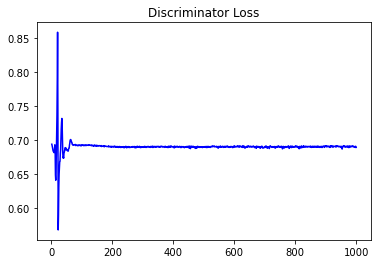

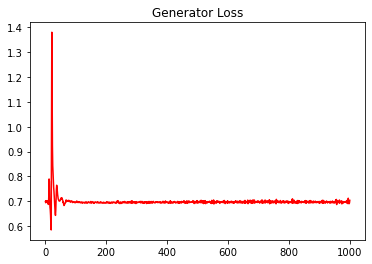

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.3539547837140207


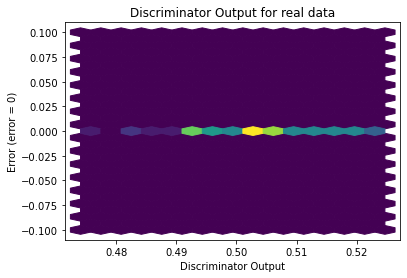

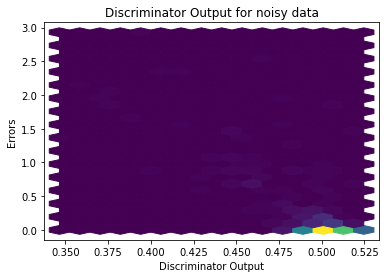

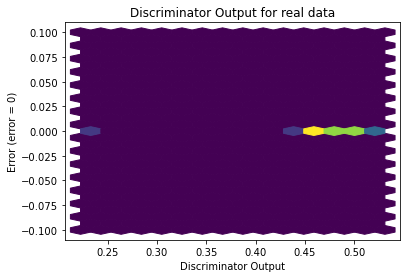

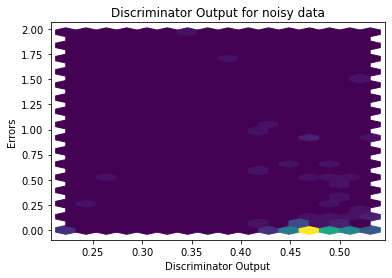

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


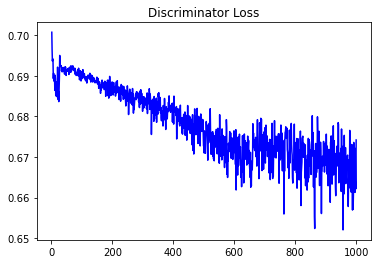

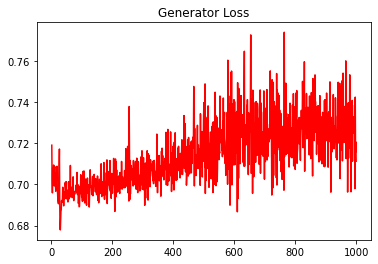

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.3024220297894542


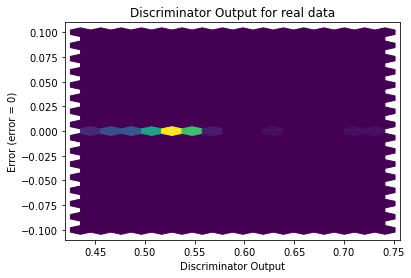

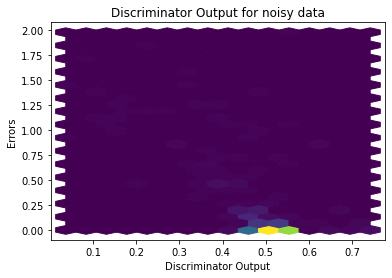

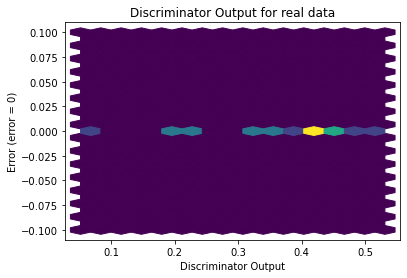

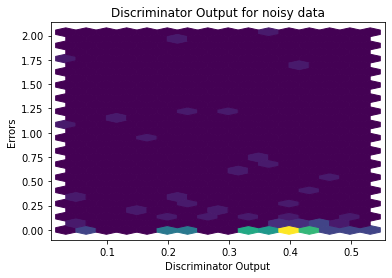

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2179]], requires_grad=True)
